In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..'); sys.path.append('../gp/')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [32]:
NETS = []
NETS.append('../nets/IPMLB_FULL.p') # image + prob + binary + large border

network_path = NETS[-1]

with open(network_path, 'rb') as f:
    net = pickle.load(f)

In [3]:
# load cremi A data
import h5py
import mahotas as mh
import numpy as np
import tifffile as tif

In [4]:
input_image = np.zeros((125,1250,1250))
input_rhoana = np.zeros((125,1250,1250), dtype=np.uint64)
input_gold = np.zeros((125,1250,1250), dtype=np.uint64)
input_prob = np.zeros((125,1250,1250))

for z in range(125):
    image, prob, gold, rhoana = gp.Cremi.read_section('/home/d/data/CREMI/A/', z)
    input_image[z] = image
    input_prob[z] = prob
    input_gold[z] = gold
    input_rhoana[z] = rhoana

Loading 000000000_000000000_000000000_image.png
Loading 000000000_000000000_000000001_image.png
Loading 000000000_000000000_000000002_image.png
Loading 000000000_000000000_000000003_image.png
Loading 000000000_000000000_000000004_image.png
Loading 000000000_000000000_000000005_image.png
Loading 000000000_000000000_000000006_image.png
Loading 000000000_000000000_000000007_image.png
Loading 000000000_000000000_000000008_image.png
Loading 000000000_000000000_000000009_image.png
Loading 000000000_000000000_000000010_image.png
Loading 000000000_000000000_000000011_image.png
Loading 000000000_000000000_000000012_image.png
Loading 000000000_000000000_000000013_image.png
Loading 000000000_000000000_000000014_image.png
Loading 000000000_000000000_000000015_image.png
Loading 000000000_000000000_000000016_image.png
Loading 000000000_000000000_000000017_image.png
Loading 000000000_000000000_000000018_image.png
Loading 000000000_000000000_000000019_image.png
Loading 000000000_000000000_000000020_im

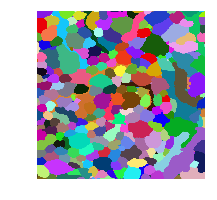

In [14]:
gp.Util.view(gold)

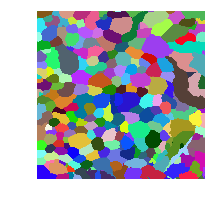

In [15]:
gp.Util.view(rhoana)

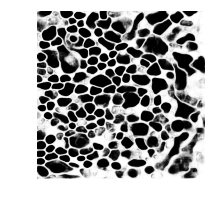

In [19]:
gp.Util.view(prob, color=False)

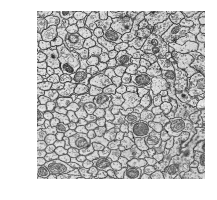

In [20]:
gp.Util.view(image, color=False)

In [54]:
gp.Util.vi(input_rhoana, input_gold)

1.1869559028075614

In [9]:
gp.metrics.adapted_rand(input_rhoana, input_gold)

0.62813858811232537

In [5]:
ar = []
for z in range(input_rhoana.shape[0]):
    ar.append(gp.metrics.adapted_rand(input_rhoana[z], input_gold[z]))

In [6]:
import collections

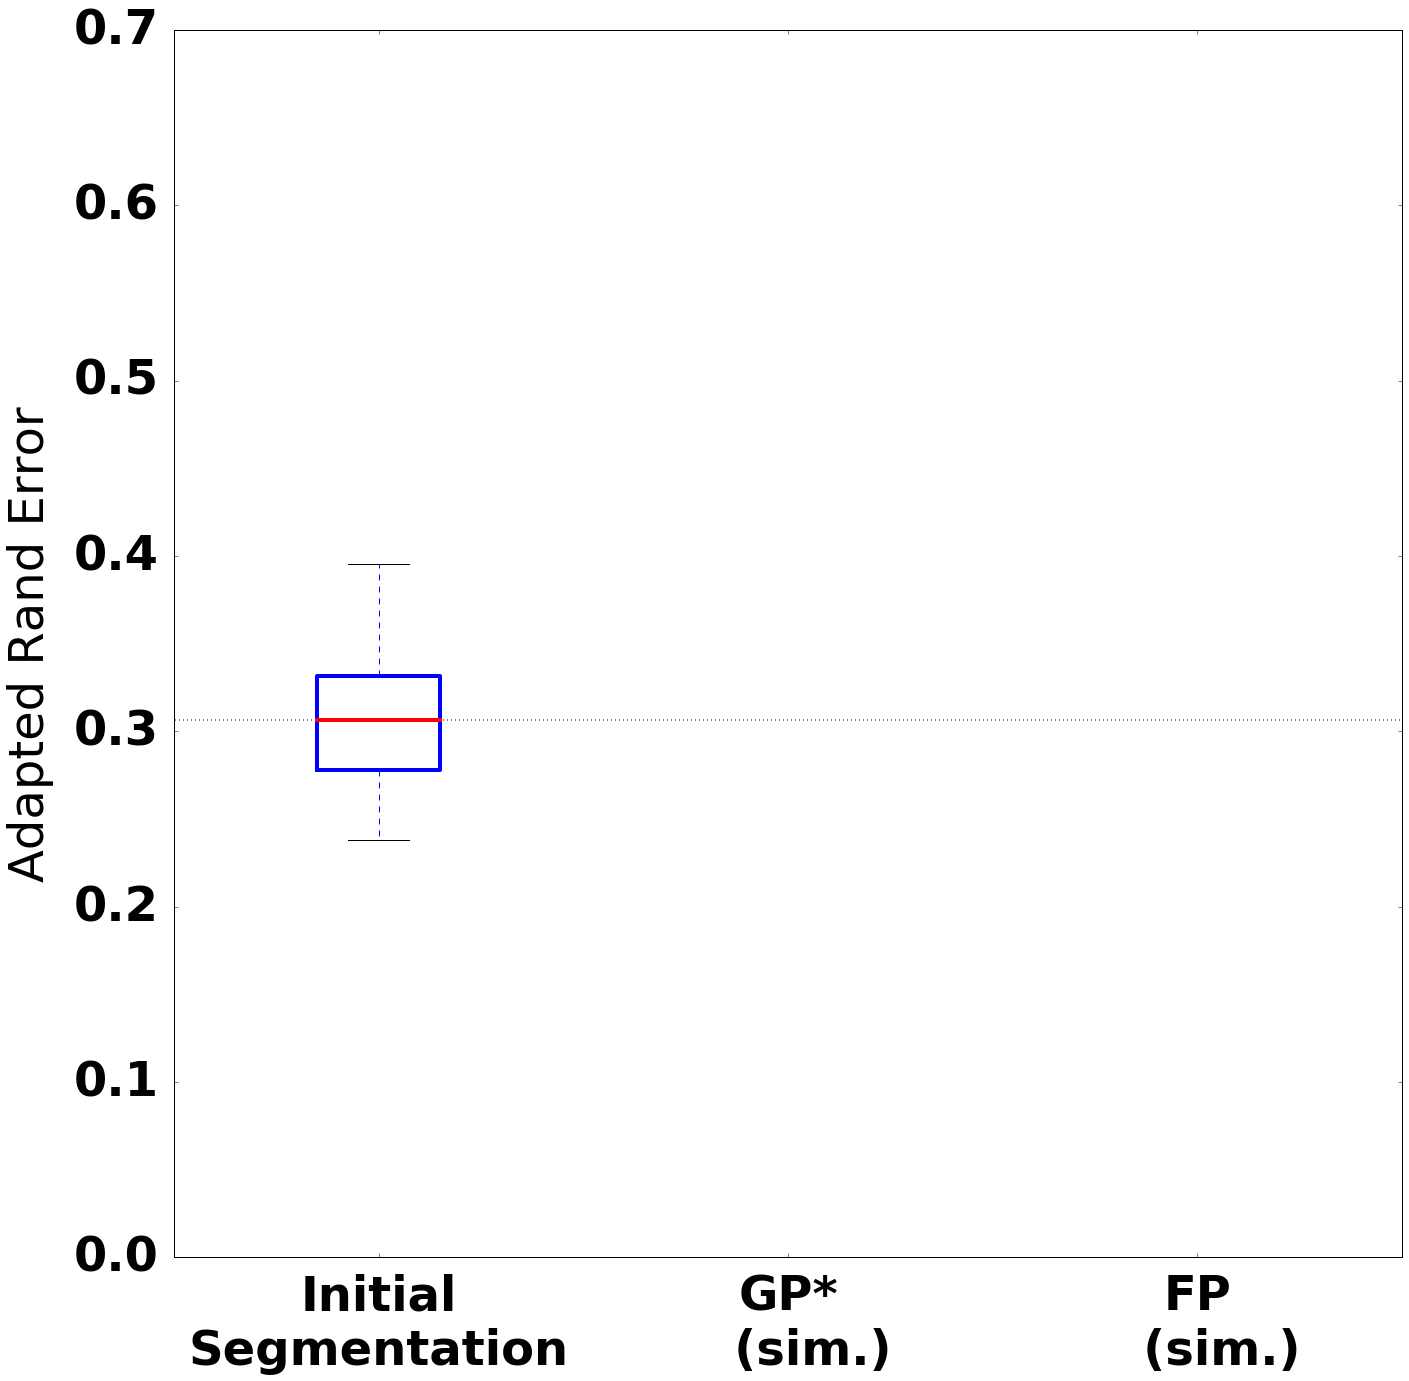

In [8]:
data = collections.OrderedDict()
data['Initial\nSegmentation'] = ar
data['GP*\n   (sim.)'] = []#cylinder_sim_user_vi_s[-1]
# data['GP*\n   (sim.)'] = []#[v - 0.1 for v in dojo_vi_95[2]]
data['FP\n   (sim.)'] = []#dojo_vi_95[2]

gp.Legacy.plot_arand(data, '/tmp/cremi.pdf')#, output_folder+'/dojo_vi.pdf')

In [40]:
net.uuid = 'IPMLB'
bigM_cremiA = gp.Legacy.create_bigM_without_mask(net, input_image, input_prob, input_rhoana, verbose=True)

2416 generated in 56.9996027946 seconds.
Grouped into 566 patches in 0.0106589794159 seconds.
2464 generated in 64.3138799667 seconds.
Grouped into 576 patches in 0.0101459026337 seconds.


In [48]:
bigM_cA_after_95, out_cA_volume_after_auto_95, cA_auto_fixes_95, cA_auto_vi_s_95 = gp.Legacy.splits_global_from_M_automatic(net, 
                                                                                                                            bigM_cremiA, 
                                                                                                                            input_image, 
                                                                                                                            input_prob, 
                                                                                                                            input_rhoana,
                                                                                                                            input_gold, 
                                                                                                                            sureness_threshold=.95)


In [53]:
gp.Util.vi(out_cA_volume_after_auto_95, input_gold)

1.6335262334342104

In [56]:
gp.metrics.adapted_rand(out_cA_volume_after_auto_95, input_gold)

0.51512425659267813

In [57]:
cA_auto_fixes_95

[(0, 0.99999964237213135),
 (1, 0.99993455410003662),
 (0, 0.99991738796234131),
 (0, 0.99988996982574463),
 (0, 0.99985110759735107),
 (0, 0.99977564811706543),
 (0, 0.9997628927230835),
 (1, 0.99975866079330444),
 (0, 0.99974793195724487),
 (0, 0.99972277879714966),
 (0, 0.99971282482147217),
 (0, 0.99967020750045776),
 (1, 0.99959456920623779),
 (1, 0.999583899974823),
 (0, 0.99957650899887085),
 (1, 0.99951696395874023),
 (1, 0.99937832355499268),
 (0, 0.99928903579711914),
 (1, 0.99907684326171875),
 (0, 0.99902892112731934),
 (0, 0.99892705678939819),
 (0, 0.99888914823532104),
 (1, 0.9998706579208374),
 (1, 0.99888545274734497),
 (1, 0.99886083602905273),
 (0, 0.99883228540420532),
 (0, 0.99930858612060547),
 (0, 0.99880576133728027),
 (0, 0.99867504835128784),
 (1, 0.99838781356811523),
 (0, 0.99836021661758423),
 (1, 0.998313307762146),
 (0, 0.99977326393127441),
 (1, 0.99948069096907322),
 (0, 0.99829679727554321),
 (0, 0.99823164939880371),
 (0, 0.99810117483139038),
 (0, 0.